# Estructuración Portafolio Black Litterman

In [8]:
!pip install -r requirements.pip

^C


In [8]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import quadprog
from ipywidgets import interact
import ipywidgets as widgets
from matplotlib import pyplot as plt

## Extracción de datos


In [12]:
!pip install openpyxl

In [7]:
pd.options.display.float_format = '{0:.2%}'.format
fecha1="31/12/2007"
fecha2="31/12/2009"
datos_historicos.loc[fecha1:fecha2].iloc[3]["COLCAP Index"]
rt_diarias
#views_abs[["ACTIVO","View","Confianza"]].set_index("ACTIVO")
#YA NO ME SIRVE PORQUE DESDE LA LECTURA DECLARE ACTIVO COMO INDICE
assets_with_views = views_abs.index
assets_with_views
assets = rt_diarias.columns
assets

NameError: name 'datos_historicos' is not defined

In [9]:
ruta="DATOS_BL.xlsx"
datos_historicos=pd.read_excel(ruta,"Historicos").set_index("FECHA")
pd.options.display.float_format = '{0:.2%}'.format
rt_diarias=np.log(datos_historicos/datos_historicos.shift(1)).iloc[1:]
views_abs=pd.read_excel(ruta,"Views").set_index("ACTIVO")
assets_with_views = views_abs.index
assets = rt_diarias.columns
rt_diarias

,COLCAP Index,COFX Index,CTES Index,CUVR Index,COONIBR Index,LUATTRUU Index,LUACTRUU Index,LF98TRUU Index,EMUSTRUU Index,SPX Index,SX5E Index,NKY Index,MXEF Index
FECHA,,,,,,,,,,,,,
2008-01-01,0.00%,0.00%,0.03%,0.00%,NaN,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.03%
2008-01-02,-0.50%,-0.15%,0.04%,0.06%,NaN,0.77%,0.91%,0.02%,0.24%,-1.45%,-1.38%,0.00%,-0.86%
2008-01-03,-0.28%,-0.34%,-0.40%,0.02%,NaN,-0.00%,-0.14%,-0.29%,0.03%,0.00%,-0.13%,0.00%,-0.63%
2008-01-04,-0.29%,0.04%,0.01%,0.11%,NaN,0.30%,0.17%,-0.45%,0.01%,-2.49%,-1.46%,-4.11%,-0.20%
2008-01-05,0.00%,0.00%,0.00%,0.00%,NaN,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-23,0.12%,0.91%,0.06%,0.04%,0.05%,-0.37%,-0.37%,0.05%,-0.10%,0.18%,-0.17%,-1.33%,-0.05%
2018-07-24,-0.27%,-0.45%,-0.01%,-0.03%,0.01%,0.10%,0.32%,0.08%,0.07%,0.48%,0.84%,0.51%,1.01%
2018-07-25,-1.15%,-0.35%,-0.13%,0.04%,0.01%,0.07%,0.14%,0.03%,0.20%,0.91%,-0.43%,0.46%,0.78%


### Procesamiento de datos historicos

In [10]:
matriz_cov=365*rt_diarias.cov()
diag=np.diag(matriz_cov)
diag
desvdiag=np.sqrt(np.diag(matriz_cov))
desvdiag               
vectorvolat=pd.Series(np.sqrt(np.diag(matriz_cov)),index=rt_diarias.cov().index)
vectorvolat
rt_p=rt_diarias.mean(0)
rt_p

COLCAP Index      0.01%
COFX Index        0.01%
CTES Index        0.02%
CUVR Index        0.03%
COONIBR Index     0.01%
LUATTRUU Index    0.01%
LUACTRUU Index    0.01%
LF98TRUU Index    0.02%
EMUSTRUU Index    0.02%
SPX Index         0.02%
SX5E Index       -0.01%
NKY Index         0.01%
MXEF Index       -0.00%
dtype: float64

In [11]:
#se calcula matriz de covarianzas
matriz_cov=365*rt_diarias.cov()
hist_vol=pd.Series(np.sqrt(np.diag(matriz_cov)), index=matriz_cov.index)

#se calculan lo retornos históricos promedio
rt_prom=rt_diarias.mean(0)*365
rt_prom
views_rt = views_abs["View"] #q
views_vol = np.diag((1-views_abs["Confianza"])/views_abs["Confianza"]*(hist_vol[views_abs.index]**2)) #Omega
views_vol
views_vol = pd.DataFrame(views_vol, index=assets_with_views, columns=assets_with_views)
views_vol

ACTIVO,COLCAP Index,CTES Index,CUVR Index,LUATTRUU Index,LUACTRUU Index,LF98TRUU Index,EMUSTRUU Index,SPX Index,SX5E Index,NKY Index,MXEF Index
ACTIVO,,,,,,,,,,,
COLCAP Index,0.56%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CTES Index,0.00%,0.04%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CUVR Index,0.00%,0.00%,0.09%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
LUATTRUU Index,0.00%,0.00%,0.00%,0.04%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
LUACTRUU Index,0.00%,0.00%,0.00%,0.00%,0.06%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
LF98TRUU Index,0.00%,0.00%,0.00%,0.00%,0.00%,0.06%,0.00%,0.00%,0.00%,0.00%,0.00%
EMUSTRUU Index,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.05%,0.00%,0.00%,0.00%,0.00%
SPX Index,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.87%,0.00%,0.00%,0.00%
SX5E Index,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,1.20%,0.00%,0.00%


### Modelo de Black Litterman

In [14]:
views_rt = views_abs["View"] #q
views_vol = np.diag((1-views_abs["Confianza"])/views_abs["Confianza"]*(hist_vol[views_abs.index]**2)) #Omega
views_vol = pd.DataFrame(views_vol, index=assets_with_views, columns=assets_with_views)

matriz_p = []
for name in assets_with_views:
    matriz_p.append((assets == name).astype(int))

matriz_p = pd.DataFrame(matriz_p, index=assets_with_views, columns=assets)
matriz_p


,COLCAP Index,COFX Index,CTES Index,CUVR Index,COONIBR Index,LUATTRUU Index,LUACTRUU Index,LF98TRUU Index,EMUSTRUU Index,SPX Index,SX5E Index,NKY Index,MXEF Index
ACTIVO,,,,,,,,,,,,,
COLCAP Index,1,0,0,0,0,0,0,0,0,0,0,0,0
CTES Index,0,0,1,0,0,0,0,0,0,0,0,0,0
CUVR Index,0,0,0,1,0,0,0,0,0,0,0,0,0
LUATTRUU Index,0,0,0,0,0,1,0,0,0,0,0,0,0
LUACTRUU Index,0,0,0,0,0,0,1,0,0,0,0,0,0
LF98TRUU Index,0,0,0,0,0,0,0,1,0,0,0,0,0
EMUSTRUU Index,0,0,0,0,0,0,0,0,1,0,0,0,0
SPX Index,0,0,0,0,0,0,0,0,0,1,0,0,0
SX5E Index,0,0,0,0,0,0,0,0,0,0,1,0,0


#### Rentabilidad y Covarianza de Black Litterman 

In [71]:
rt_bl=inv(inv(matriz_cov)+matriz_p.T.dot(inv(views_vol).dot(matriz_p))).dot(
    inv(matriz_cov).dot(rt_prom)+matriz_p.T.dot(inv(views_vol).dot(views_rt)))
rt_bl=pd.Series(rt_bl,index=assets)
cov_bl=matriz_cov+inv(inv(matriz_cov)+matriz_p.T.dot(inv(views_vol).dot(matriz_p)))
vol_bl=pd.Series(np.sqrt(np.diag(cov_bl)), index=assets)
sharpe_bl=(rt_bl-0.045)/vol_bl

print(rt_bl)
print(vol_bl)


COLCAP Index     3.62%
COFX Index       5.05%
CTES Index       6.56%
CUVR Index       3.92%
COONIBR Index    4.52%
LUATTRUU Index   2.65%
LUACTRUU Index   3.96%
LF98TRUU Index   5.54%
EMUSTRUU Index   4.52%
SPX Index        9.54%
SX5E Index       3.28%
NKY Index        7.34%
MXEF Index       3.44%
dtype: float64
COLCAP Index     17.53%
COFX Index       17.36%
CTES Index        4.43%
CUVR Index        7.10%
COONIBR Index     0.38%
LUATTRUU Index    4.73%
LUACTRUU Index    5.72%
LF98TRUU Index    5.80%
EMUSTRUU Index    5.33%
SPX Index        21.72%
SX5E Index       25.46%
NKY Index        27.07%
MXEF Index       22.06%
dtype: float64


## Optimización

In [72]:
#Definición de variables para optimización
def port_rt(pesos, rt_esp):
    return pesos.dot(rt_esp)
def port_vol(pesos, cov_esp):
    return np.sqrt(pesos.T.dot(cov_esp.dot(pesos)))
def port_sharpe(sharpe_esp):
    return sharpe_esp

#Definición de restricciones
def optimize(rt_esp, cov_esp):    
    n_assets=len(assets)
    G=2*cov_esp.values
    a=np.zeros(n_assets)
    #uno por los pesos para que port sume 100
    C=np.ones((1, n_assets))
    #para ver cada peso debo hacerlo con una matriz identidad
    C=np.append(C, np.eye(n_assets), axis=0)
    #debo poner matriz identidad negativa para comparra cada w y que sea menor o igual al 25%
    C=np.append(C, -np.eye(n_assets), axis=0)
    C=np.append(C, -(assets == "COONIBR Index").astype(int).reshape((1, n_assets)), axis=0)
    C=np.append(C, (assets == "COONIBR Index").astype(int).reshape((1, n_assets)), axis=0)
    C=np.append(C, -(assets == "COFX Index").astype(int).reshape((1, n_assets)), axis=0)
    C=np.append(C, rt_esp.values.reshape((1, n_assets)), axis=0)
    
    b=np.append(np.zeros(n_assets+1), -0.25*np.ones(n_assets))
    #iber entre el 3% y el 10% y doalr menor o igual a 10%, el 999999 se puede reemplazro por valor de rt
    b=np.append(b,[-0.1, 0.03, -0.1, -99999])
    
    #suma 100
    b[0] = 1.0
    
    #quadprog me devuleve lista, o es la primera fila con sln

    sol=quadprog.solve_qp(G, a, C.T, b, meq=1)
    start_profit=port_rt(sol[0], rt_esp)
    end_profit=max(rt_esp)
    current_profit=start_profit
    step=0.001

    asset_vol = []
    asset_rt = []
    asset_vol.append(port_vol(sol[0], cov_esp))
    asset_rt.append(start_profit)

    asset_pesos=[]
    asset_pesos.append(sol[0])
    
#Optimizción para cada punto de la frontera eficiente    

    while current_profit<=end_profit:
        current_profit+=step
        b[-1]=current_profit
        try:
            sol=quadprog.solve_qp(G, a, C.T, b, meq=1)
        except ValueError:
            print("Optimizacion Terminada")
            break
        asset_vol.append(port_vol(sol[0], cov_esp))
        asset_rt.append(current_profit)
        asset_pesos.append(sol[0])
    
    frontera = {'volatilidad': asset_vol, 'retorno': asset_rt}
    asset_pesos=pd.DataFrame(asset_pesos,columns=assets, index=asset_vol)
    return {'frontera': frontera, 'asset_pesos': asset_pesos}

result = optimize(rt_bl, cov_bl)
asset_pesos = result['asset_pesos']
frontera = result['frontera']
asset_pesos


Optimizacion Terminada


,COLCAP Index,COFX Index,CTES Index,CUVR Index,COONIBR Index,LUATTRUU Index,LUACTRUU Index,LF98TRUU Index,EMUSTRUU Index,SPX Index,SX5E Index,NKY Index,MXEF Index
2.33%,0.00%,5.68%,25.00%,8.71%,10.00%,25.00%,0.00%,15.72%,7.57%,2.31%,0.00%,0.00%,-0.00%
2.36%,-0.00%,6.08%,25.00%,6.88%,10.00%,24.80%,0.00%,18.81%,5.08%,3.34%,-0.00%,-0.00%,-0.00%
2.41%,0.00%,6.65%,25.00%,6.58%,10.00%,21.79%,0.00%,20.78%,5.50%,3.71%,0.00%,-0.00%,-0.00%
2.49%,-0.00%,7.22%,25.00%,6.27%,10.00%,18.77%,0.00%,22.75%,5.91%,4.08%,-0.00%,0.00%,-0.00%
2.59%,0.00%,7.71%,25.00%,6.15%,10.00%,14.40%,2.36%,23.85%,6.12%,4.42%,-0.00%,0.00%,-0.00%
2.69%,-0.00%,8.13%,25.00%,6.18%,10.00%,8.92%,6.62%,24.26%,6.17%,4.72%,-0.00%,0.00%,-0.00%
2.81%,-0.00%,8.55%,25.00%,6.22%,10.00%,3.44%,10.88%,24.67%,6.23%,5.02%,-0.00%,0.00%,0.00%
2.93%,0.00%,9.06%,25.00%,5.61%,10.00%,0.00%,13.22%,25.00%,6.31%,5.80%,-0.00%,0.00%,0.00%
3.09%,0.00%,9.73%,25.00%,3.93%,10.00%,0.00%,12.36%,25.00%,6.56%,7.42%,-0.00%,0.00%,0.00%
3.28%,0.00%,10.00%,25.00%,2.39%,10.00%,0.00%,11.91%,25.00%,6.41%,8.97%,-0.00%,0.32%,0.00%


A pesar de las restricciones ingresadas al modelo, se obtuvieron resultados poco diversificados. Se propone optimizar a partir de un portafolio en el mejor escenario posible y un portafolio en el peor escenario posible, definicendose como el portafolio en equilibrio + o - la volatilidad, despues se define un peso para elportafolio optimista otro para el pesimista y se obtiene un nuevo Asset Allocation 

In [78]:
max_bl_rt = rt_bl+vol_bl
min_bl_rt = rt_bl-vol_bl

result_max = optimize(max_bl_rt, cov_bl)
asset_max = result_max['asset_pesos']
asset_max = asset_max.iloc[np.logical_and(asset_max.index <= 0.1, asset_max.index >= 0.08)]
frontera_max = result_max['frontera']
result_min = optimize(min_bl_rt, cov_bl)
asset_min = result_min['asset_pesos']
frontera_min = result_min['frontera']


Optimizacion Terminada
Optimizacion Terminada


In [79]:
asset_min

,COLCAP Index,COFX Index,CTES Index,CUVR Index,COONIBR Index,LUATTRUU Index,LUACTRUU Index,LF98TRUU Index,EMUSTRUU Index,SPX Index,SX5E Index,NKY Index,MXEF Index
2.33%,0.00%,5.68%,25.00%,8.71%,10.00%,25.00%,0.00%,15.72%,7.57%,2.31%,0.00%,0.00%,-0.00%
2.33%,0.00%,5.27%,25.00%,8.43%,10.00%,25.00%,0.00%,16.52%,7.83%,1.94%,0.00%,0.00%,-0.00%
2.34%,0.00%,4.87%,25.00%,8.16%,10.00%,25.00%,0.00%,17.32%,8.08%,1.57%,0.00%,0.00%,-0.00%
2.35%,0.00%,4.46%,25.00%,7.88%,10.00%,25.00%,0.00%,18.12%,8.34%,1.20%,0.00%,0.00%,0.00%
2.37%,-0.00%,4.05%,25.00%,7.61%,10.00%,25.00%,0.00%,18.92%,8.60%,0.83%,0.00%,0.00%,0.00%
2.39%,-0.00%,3.64%,25.00%,7.33%,10.00%,25.00%,0.00%,19.72%,8.85%,0.46%,0.00%,0.00%,0.00%
2.42%,-0.00%,3.23%,25.00%,7.06%,10.00%,25.00%,0.00%,20.51%,9.11%,0.09%,0.00%,0.00%,0.00%
2.45%,-0.00%,2.60%,25.00%,6.50%,10.00%,25.00%,0.00%,21.37%,9.52%,0.00%,0.00%,0.00%,0.00%
2.49%,0.00%,1.91%,25.00%,5.86%,10.00%,25.00%,0.00%,22.25%,9.99%,-0.00%,0.00%,0.00%,0.00%
2.54%,0.00%,1.21%,25.00%,5.21%,10.00%,25.00%,0.00%,23.12%,10.45%,0.00%,0.00%,0.00%,0.00%


In [80]:
asset_max

,COLCAP Index,COFX Index,CTES Index,CUVR Index,COONIBR Index,LUATTRUU Index,LUACTRUU Index,LF98TRUU Index,EMUSTRUU Index,SPX Index,SX5E Index,NKY Index,MXEF Index
8.07%,7.28%,10.00%,11.11%,6.85%,3.00%,0.00%,18.68%,0.00%,0.00%,25.00%,1.45%,16.63%,-0.00%
8.14%,7.43%,10.00%,10.77%,6.84%,3.00%,0.00%,18.49%,0.00%,0.00%,25.00%,1.59%,16.87%,-0.00%
8.22%,7.59%,10.00%,10.42%,6.83%,3.00%,0.00%,18.31%,0.00%,0.00%,25.00%,1.73%,17.11%,-0.00%
8.29%,7.74%,10.00%,10.08%,6.81%,3.00%,0.00%,18.13%,0.00%,0.00%,25.00%,1.88%,17.36%,-0.00%
8.37%,7.90%,10.00%,9.74%,6.80%,3.00%,0.00%,17.95%,0.00%,0.00%,25.00%,2.02%,17.60%,-0.00%
8.45%,8.05%,10.00%,9.39%,6.78%,3.00%,0.00%,17.77%,0.00%,0.00%,25.00%,2.16%,17.84%,-0.00%
8.53%,8.21%,10.00%,9.05%,6.77%,3.00%,0.00%,17.59%,0.00%,0.00%,25.00%,2.30%,18.08%,-0.00%
8.60%,8.36%,10.00%,8.70%,6.75%,3.00%,0.00%,17.41%,0.00%,0.00%,25.00%,2.45%,18.32%,-0.00%
8.68%,8.52%,10.00%,8.36%,6.74%,3.00%,0.00%,17.23%,0.00%,0.00%,25.00%,2.59%,18.56%,-0.00%
8.76%,8.67%,10.00%,8.02%,6.73%,3.00%,0.00%,17.05%,0.00%,0.00%,25.00%,2.73%,18.81%,-0.00%


A partir de la frontera dada para el portafolio optimista y pesimista se selecciona un portafolio para cada una, a partir de los cuales se conformará el nuevo portafolio diversificado.

In [90]:
!jupyter nbextension enable --py widgetsnbextension --sys-prefix

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [106]:
best_asset_min = asset_min.iloc[0]# se toma el primer portafolio para el escenario pesimista
best_asset_max = asset_max.iloc[-1]# se toma el último portafolio para el escenario optimista

def opt_ports(perc_risky_port):
    opt_port = best_asset_min*(1-perc_risky_port) + best_asset_max*perc_risky_port
    retries=port_rt(opt_port, rt_bl)/port_vol(opt_port, cov_bl)
    Sharpe=(port_rt(opt_port, rt_bl)-0.045)/port_vol(opt_port, cov_bl)
    VaR=1.96*1000000000*port_vol(opt_port, cov_bl)

    print('Rentabilidad: ', '{0:.2%}'.format(port_rt(opt_port, rt_bl)))
    print('Volatilidad: ', '{0:.2%}'.format((port_vol(opt_port, cov_bl))))
    print('Relación_riesgo_retorno: ', '{0:.3}'.format(retries))
    print('Sharpe: ', '{0:.3}'.format(Sharpe))
    print('VaR: ', '{:,}'.format(VaR))
    print(opt_port)
    return opt_port
wbajor=0.2    
opt_port=opt_ports(wbajor)   
    
#interact(opt_ports, perc_risky_port=(0.0, 1.0))

Rentabilidad:  5.10%
Volatilidad:  3.19%
Relación_riesgo_retorno:  1.6
Sharpe:  0.189
VaR:  62,531,655.917154886
COLCAP Index      2.20%
COFX Index        6.55%
CTES Index       20.57%
CUVR Index        8.27%
COONIBR Index     8.60%
LUATTRUU Index   20.00%
LUACTRUU Index    2.87%
LF98TRUU Index   12.58%
EMUSTRUU Index    6.06%
SPX Index         6.85%
SX5E Index        0.97%
NKY Index         4.49%
MXEF Index       -0.00%
dtype: float64


## Back Testing

In [107]:

print('Rentabilidad pasada: ', '{0:.2%}'.format(port_rt((best_asset_min*0.5 + best_asset_max*0.5), rt_prom)))


Rentabilidad pasada:  5.44%


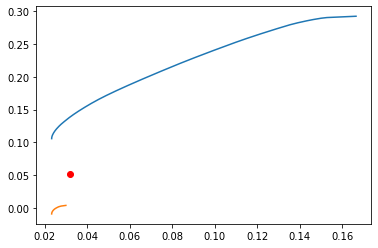

In [108]:
plt.plot(frontera_max['volatilidad'], frontera_max['retorno'])
plt.plot(frontera_min['volatilidad'], frontera_min['retorno'])
plt.plot(port_vol(opt_port, cov_bl), port_rt(opt_port, rt_bl), 'ro')